<a href="https://colab.research.google.com/github/facial09/GDL_code/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Dropout, BatchNormalization, Reshape, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_val,y_val) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape,y_train.shape) # 6만개의 28x28 짜리 데이터

(60000, 28, 28) (60000,)


In [5]:
x_train=x_train.reshape(-1,28,28,1)

In [6]:
x_train = x_train / 127.5 -1

In [7]:
encoder_input = tf.keras.Input(shape=(28,28,1))

x = Conv2D(32, 3, padding='same')(encoder_input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(64, 3 , strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(64, 3, strides = 2 , padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(64, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

encoder_output = Dense(2)(x)

In [8]:
encoder = Model(encoder_input, encoder_output)

In [9]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                             

In [10]:
decoder_input = tf.keras.Input(shape=(2,))

x = Dense(7*7*64)(decoder_input)
x = Reshape((7,7,64))(x)

x = Conv2DTranspose(64,3,strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 14 X 14 -> 28 X 28
x = Conv2DTranspose(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 28 X 28 -> 28 X 28
x = Conv2DTranspose(32, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

decoder_output = Conv2DTranspose(1,3,strides=1, padding='same', activation='tanh')(x)

In [11]:
decoder = Model(decoder_input, decoder_output)

In [12]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 64)         36928     
 nspose)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 64)          0   

In [19]:
LEARNING_RATE = 0.05
BATCH_SIZE = 32

In [20]:
encoder_in = tf.keras.Input(shape = (28,28,1))
x = encoder(encoder_in)
decoder_out = decoder(x)

In [21]:
autoencoder = Model(encoder_in, decoder_out)

In [22]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE), loss = tf.keras.losses.MeanSquaredError())

In [23]:
checkpoint_path = '/content/mymodels/basic_autoencoder_Mnist.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,
                             save_best_only=True,
                             save_weights_only=True,
                             monitor='loss',
                             verbose=1)

In [24]:
autoencoder.fit(x_train,x_train,
                batch_size = BATCH_SIZE,
                epochs=13,
                callbacks=[checkpoint],
                )

Epoch 1/13
1871/1875 [============================>.] - ETA: 0s - loss: 0.1975
Epoch 1: loss improved from inf to 0.19749, saving model to /content/mymodels/basic_autoencoder_Mnist.ckpt
1875/1875 [==============================] - 15s 7ms/step - loss: 0.1975
Epoch 2/13
1873/1875 [============================>.] - ETA: 0s - loss: 0.1846
Epoch 2: loss improved from 0.19749 to 0.18461, saving model to /content/mymodels/basic_autoencoder_Mnist.ckpt
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1846
Epoch 3/13
1869/1875 [============================>.] - ETA: 0s - loss: 0.1797
Epoch 3: loss improved from 0.18461 to 0.17967, saving model to /content/mymodels/basic_autoencoder_Mnist.ckpt
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1797
Epoch 4/13
1871/1875 [============================>.] - ETA: 0s - loss: 0.1766
Epoch 4: loss improved from 0.17967 to 0.17655, saving model to /content/mymodels/basic_autoencoder_Mnist.ckpt
1875/1875 [==============

In [26]:
autoencoder.load_weights(checkpoint_path)

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
xy= encoder.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [29]:
xy.shape, y_train.shape

((60000, 2), (60000,))

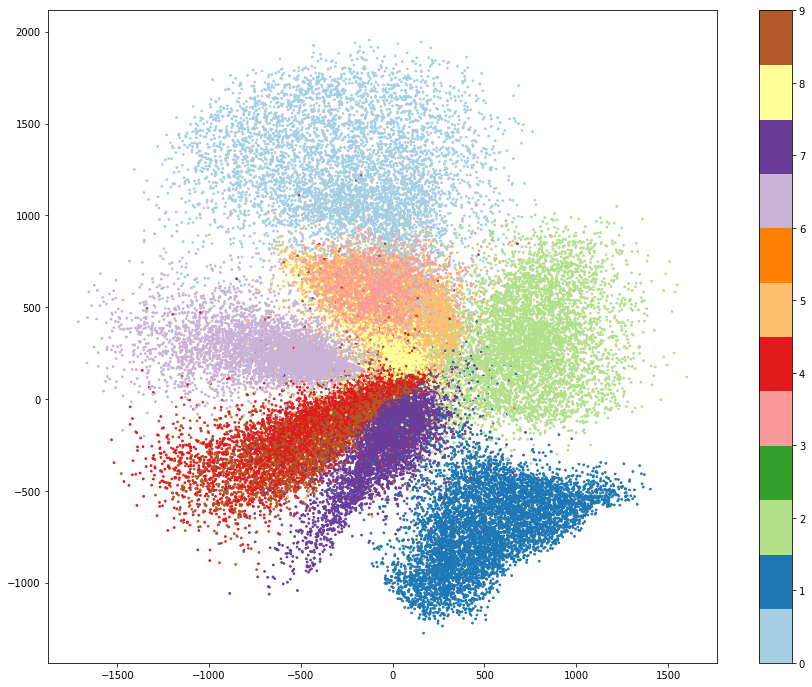

In [30]:
plt.figure(figsize=(15, 12))
plt.scatter(x=xy[:, 0], y=xy[:, 1], c=y_train, cmap=plt.get_cmap('Paired'), s=3)
plt.colorbar()
plt.show()

In [32]:
decoded_imanges = autoencoder.predict(x_train)

1875/1875 [==============================] - 6s 3ms/step


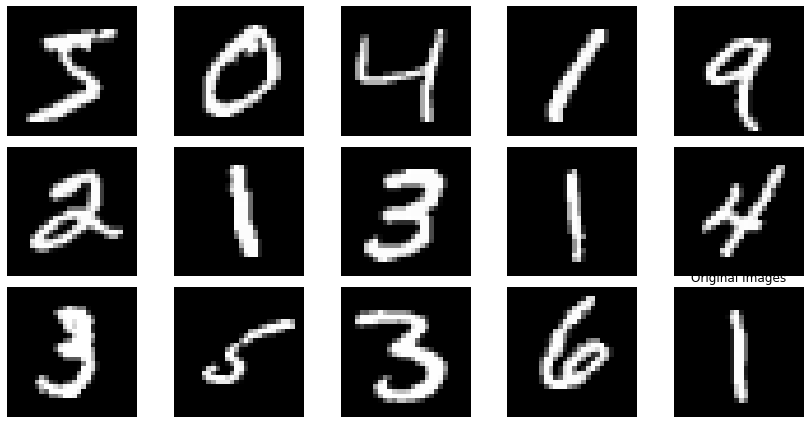

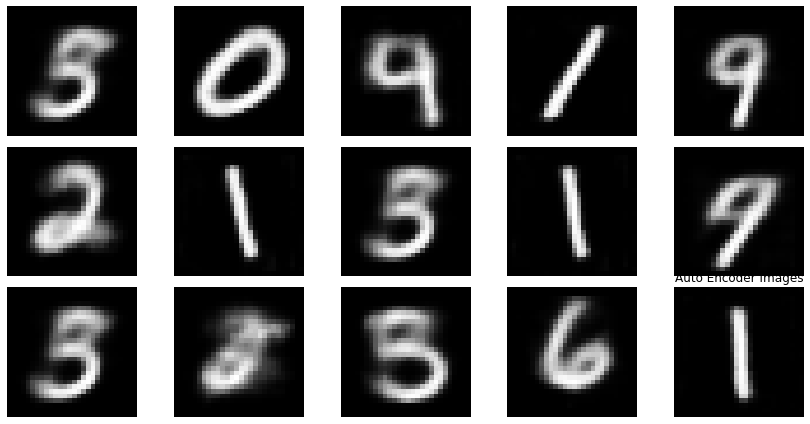

In [34]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Original Images')
plt.show()

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(decoded_imanges[i].reshape(28, 28), cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Auto Encoder Images')
plt.show()